In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
m = pd.read_csv("measurements.csv")

In [3]:
mod = smf.ols('BMI_init ~ weight_init', data = m)

In [4]:
print(dir(mod), end = ' ')

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_kwargs', '_data_attr', '_df_model', '_df_resid', '_fit_collinear', '_fit_ridge', '_fit_zeros', '_formula_max_endog', '_get_init_kwds', '_handle_data', '_init_keys', '_kwargs_allowed', '_setup_score_hess', '_sqrt_lasso', 'data', 'df_model', 'df_resid', 'endog', 'endog_names', 'exog', 'exog_names', 'fit', 'fit_regularized', 'formula', 'from_formula', 'get_distribution', 'hessian', 'hessian_factor', 'information', 'initialize', 'k_constant', 'loglike', 'nobs', 'pinv_wexog', 'predict', 'rank', 'score', 'weights', 'wendog', 'wexog', 'whiten'] 

In [5]:
for i in mod.__dict__:        #just input data
    print(i, end = '   ')

weights   data   k_constant   exog   endog   _data_attr   _init_keys   wexog   wendog   nobs   _df_model   _df_resid   rank   pinv_wexog   formula   

In [6]:
mod.nobs

80.0

In [7]:
#print(mod.__doc__)

In [8]:
print(dir(mod.fit()), end = ' ')

['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abat_diagonal', '_cache', '_data_attr', '_data_in_cache', '_get_robustcov_results', '_get_wald_nonlinear', '_is_nested', '_transform_predict_exog', '_use_t', '_wexog_singular_values', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_prediction', 'get_robustcov_results', 'info_criteria', 'initialize', 'k_c

In [9]:
for i in mod.fit().__dict__:   #these objects are not that useful
    print(i)

_results
__doc__


In [10]:
# print(smf.ols('BMI_init ~ weight_init', data = m).fit().__doc__)

# smf.ols('BMI_init ~ weight_init', data = m).fit()._results.__dict__

# for i in smf.ols('BMI_init ~ weight_init', data = m).fit()._results.model.__dict__:
    # print(i, end = '   ')

In [39]:
mod.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               BMI_init   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     68.38
Date:                Fri, 12 Apr 2024   Prob (F-statistic):           2.83e-12
Time:                        16:18:36   Log-Likelihood:                -173.13
No. Observations:                  80   AIC:                             350.3
Df Residuals:                      78   BIC:                             355.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      14.2317      1.659      8.580      0.000      10.930      17.534
weight_init     0.2023      0.024      8.269      0.000       0.154       0.251
==============================================================================
Omnibus:                        1.666   Durbin-Watson:                   0.976
Prob(Omnibus):                  0.435   Jarque-Bera (JB):                1.697
Skew:                           0.306   Prob(JB):                        0.428
Kurtosis:                       2.632   Cond. No.                         472.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Coefficients, predicted y, residuals

In [11]:
mod.fit().params

Intercept      14.231662
weight_init     0.202282
dtype: float64

In [12]:
mod.endog[0]        #y, dependent variable

27.84008973

In [13]:
(mod.exog @ mod.fit().params)[0]

28.290258364116703

In [14]:
mod.fit().fittedvalues[0]

28.290258364116703

In [15]:
(mod.exog @ mod.fit().params - mod.endog)[0]    # X * beta - y, yhat - y, the residuals

0.4501686341167037

In [16]:
mod.fit().resid[0]

-0.4501686341167037

## SSR, sum of squared residuals

In [17]:
(mod.exog @ mod.fit().params - mod.endog).T @ (mod.exog @ mod.fit().params - mod.endog)

355.1002568337898

In [18]:
mod.fit().ssr    #sum of squared residuals

355.1002568337898

## ESS, explained sum of squares

In [19]:
mod.fit().ess    #explained sum of squares

311.31674853115385

In [20]:
sum((mod.fit().fittedvalues - mod.endog.mean())**2)

311.3167485311536

## TSS, total sum of squares

In [21]:
(mod.endog - mod.endog.mean())[0]

0.03505521037500259

In [22]:
((mod.endog - mod.endog.mean())**2)[0]

0.001228867774435689

In [23]:
tss = sum((mod.endog - mod.endog.mean())**2)    #total sum of squares
tss

666.4170053649435

In [24]:
mod.fit().centered_tss

666.4170053649436

## TSS = ESS + SSR

In [25]:
mod.fit().ess + mod.fit().ssr      # ess + ssr = tss

666.4170053649436

## R^2

In [26]:
1 - mod.fit().ssr / tss

0.46715006673737314

In [27]:
mod.fit().rsquared

0.46715006673737325

## MSE, mean squared error

In [28]:
mse = mod.fit().ssr/mod.nobs        #mean squared error or mean squared deviation
mse

4.438753210422372

In [29]:
mod.fit().ssr/mod.fit().df_resid    #mean squared error with df instead of n

4.552567395304997

In [30]:
mod.fit().mse_resid

4.552567395304997

In [31]:
mod.fit().scale

4.552567395304997

## MAE, mean absolute error

In [32]:
mae = sum(abs(mod.fit().resid))/mod.nobs   #mean absolute error
mae

1.715715089918183

## SEE, standard error of the estimate = RMSE, root mean squared error (df)

In [33]:
(mod.fit().ssr / mod.fit().df_resid)**0.5  #standard error of the estimate/regression, also root mean squared error, rmse

2.1336746226416525

In [34]:
see = mod.fit().scale**0.5
see

2.1336746226416525

## standard errors of coefficients, BSE

In [35]:
mod.fit().bse                              #standard errors of beta/ of coefficients

Intercept      1.658645
weight_init    0.024462
dtype: float64

## T-test statistics for coefficients and their p-values
These are one-sample t-tests where the H0 hypothesis is that the coefficients = 0,
which means no contribution of the coefficient. Since this is a one-sample t-test
compared against 0, the test statistic is just the coefficient over its standard error.

In [42]:
mod.fit().params / mod.fit().bse

Intercept      8.580292
weight_init    8.269382
dtype: float64

In [46]:
mod.fit().tvalues

Intercept      8.580292
weight_init    8.269382
dtype: float64

In [36]:
mod.fit().pvalues

Intercept      7.044168e-13
weight_init    2.827310e-12
dtype: float64

## get_prediction().summary_frame() - obtain conficence intervals, etc

In [37]:
print(dir(mod.fit().get_prediction()))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'conf_int', 'df', 'dist', 'dist_args', 'predicted', 'predicted_mean', 'row_labels', 'se', 'se_mean', 'se_obs', 'summary_frame', 'var_pred', 'var_pred_mean', 'var_resid']


In [38]:
mod.fit().get_prediction().summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,28.290258,0.245663,27.801182,28.779335,24.014376,32.566141
1,28.391399,0.248867,27.895942,28.886856,24.114783,32.668016
2,27.744097,0.238666,27.268950,28.219244,23.469786,32.018409
3,26.995654,0.257851,26.482313,27.508995,22.716928,31.274379
4,25.943788,0.327974,25.290842,26.596733,21.646078,30.241498
...,...,...,...,...,...,...
75,29.200527,0.292207,28.618787,29.782267,24.913058,33.487997
76,28.391399,0.248867,27.895942,28.886856,24.114783,32.668016
77,27.986835,0.239563,27.509902,28.463769,23.712325,32.261346
78,27.784553,0.238565,27.309607,28.259500,23.510264,32.058843


In [67]:
mod.fit().get_prediction().summary_frame().columns

Index(['mean', 'mean_se', 'mean_ci_lower', 'mean_ci_upper', 'obs_ci_lower',
       'obs_ci_upper'],
      dtype='object')

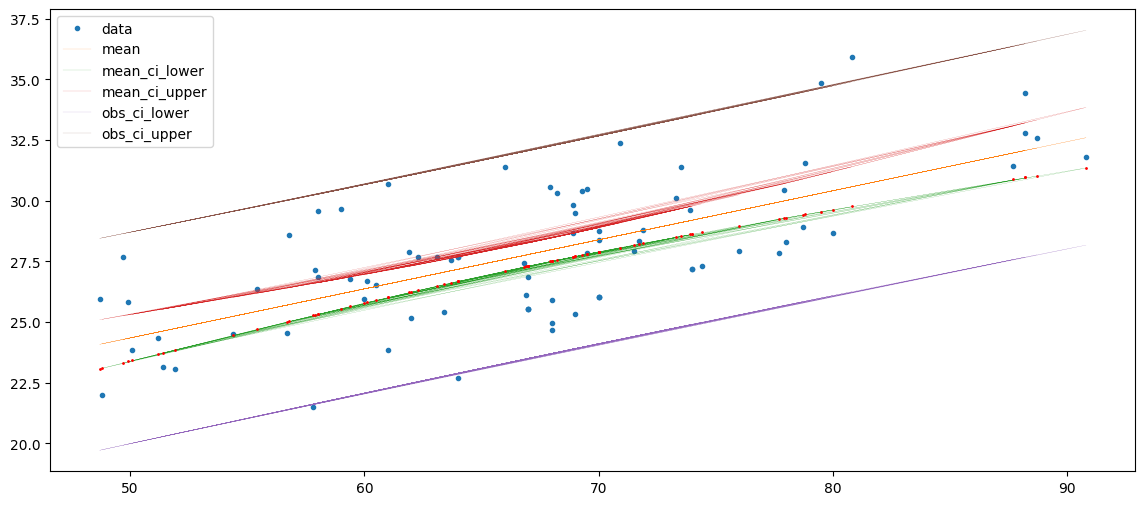

In [113]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(m.weight_init, mod.endog, 'o', markersize = 3, label = 'data')
#ax.plot(m.weight_init, mod.fit().fittedvalues, 'd--', linewidth = 0.5, markersize = 3, label = 'model')
ax.plot(m.weight_init, mod.fit().get_prediction().summary_frame().drop(columns = 'mean_se'), '-', linewidth = 0.1, markersize = 3, label = mod.fit().get_prediction().summary_frame().drop(columns = 'mean_se').columns)
ax.plot(m.weight_init, mod.fit().get_prediction().summary_frame()['mean']-mod.fit().get_prediction().summary_frame()['mean_se']*1.96, 'o', markersize = 1, color = 'red')
ax.legend(loc="best")
plt.show()